## Cats Vs Dogs Using Tensorflow 2 Keras API_V2 API

## 1. Import required libraries / dependencies

In [29]:
from matplotlib import pyplot as plt

import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras import layers

In [30]:
tf.__version__

'2.11.0'

## 2. Generate the datasets, both the training and the test sets


In [31]:
# define the paths to the dataset.
training_path = './input/cat-and-dog/training_set/'
test_path = './input/cat-and-dog/testing_set/'

In [32]:
# Create dataset
image_size = (200, 200)
batch_size = 32

subfolder_label_names = ['cats', 'dogs']

training_set = keras.preprocessing.image_dataset_from_directory(
    directory=training_path,
    class_names=subfolder_label_names,
    image_size=image_size,
    batch_size=batch_size
)
test_set = keras.preprocessing.image_dataset_from_directory(
    directory=test_path,
    class_names=subfolder_label_names,
    image_size=image_size,
    batch_size=batch_size,
    
)

Found 120 files belonging to 2 classes.
Found 120 files belonging to 2 classes.


# Visualize some images from the training set

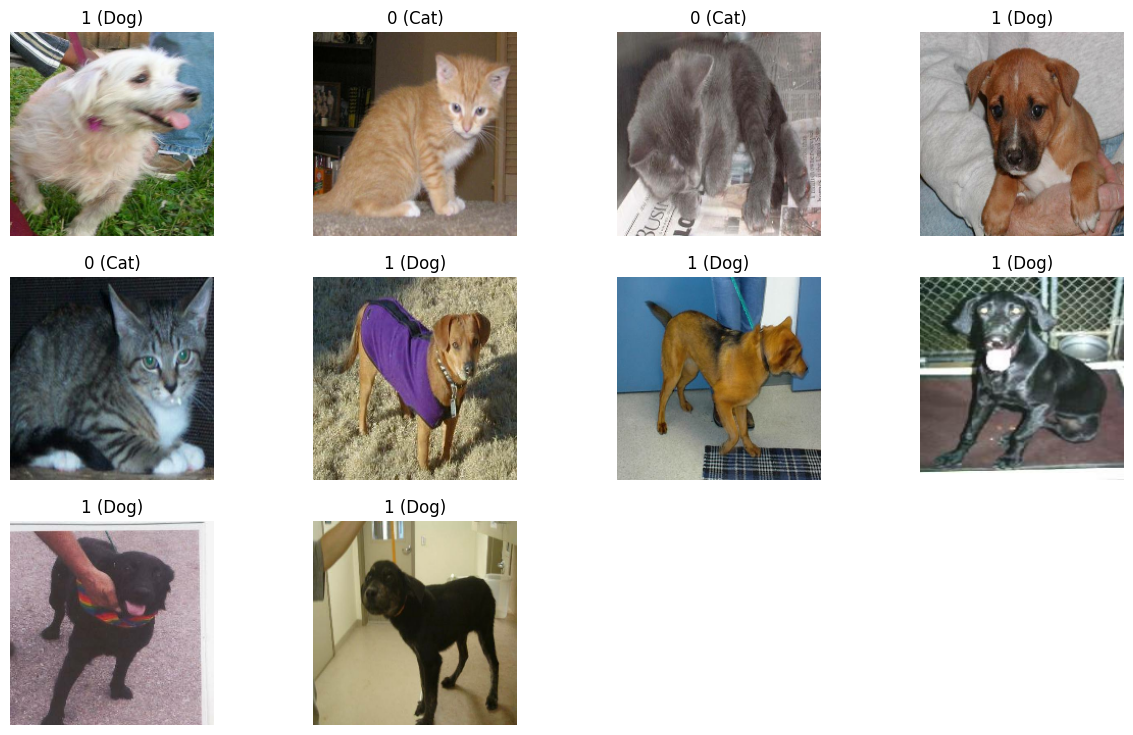

In [33]:
# visualize the training set
plt.figure(figsize=(15, 9))
def cat_or_dog(a):
    if a==0:
        return 'Cat'
    return 'Dog'
    
for images, labels in training_set.take(1):
    for i in range(10):
        plt.subplot(3, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'{int(labels[i])} ({cat_or_dog(int(labels[i]))})')
        plt.axis('off')

# Visualize some images from the test set


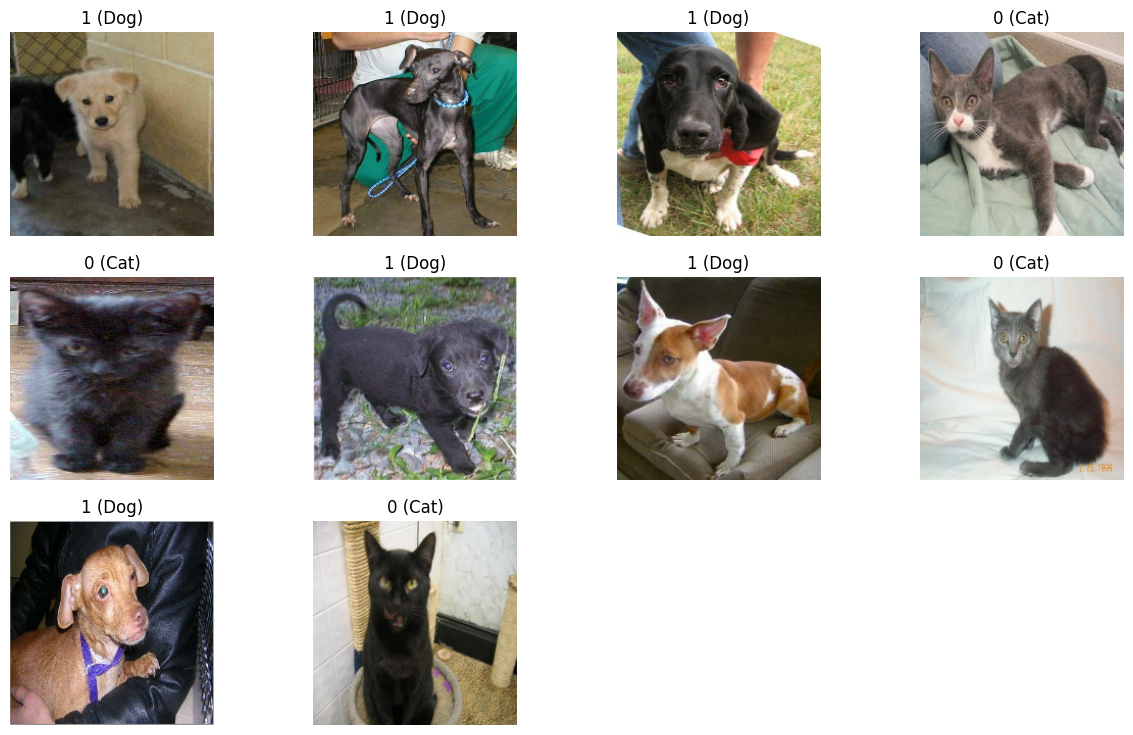

In [34]:
plt.figure(figsize=(15, 9))
def cat_or_dog(a):
    if a==0:
        return 'Cat'
    return 'Dog'
    
for images, labels in test_set.take(1):
    for i in range(10):
        plt.subplot(3, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'{int(labels[i])} ({cat_or_dog(int(labels[i]))})')
        plt.axis('off')

Data Augmentation, in its essence, means to generate new data by modifying existing data.

In [35]:
# define some layers of data augmentation
augmented_data = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1)
])

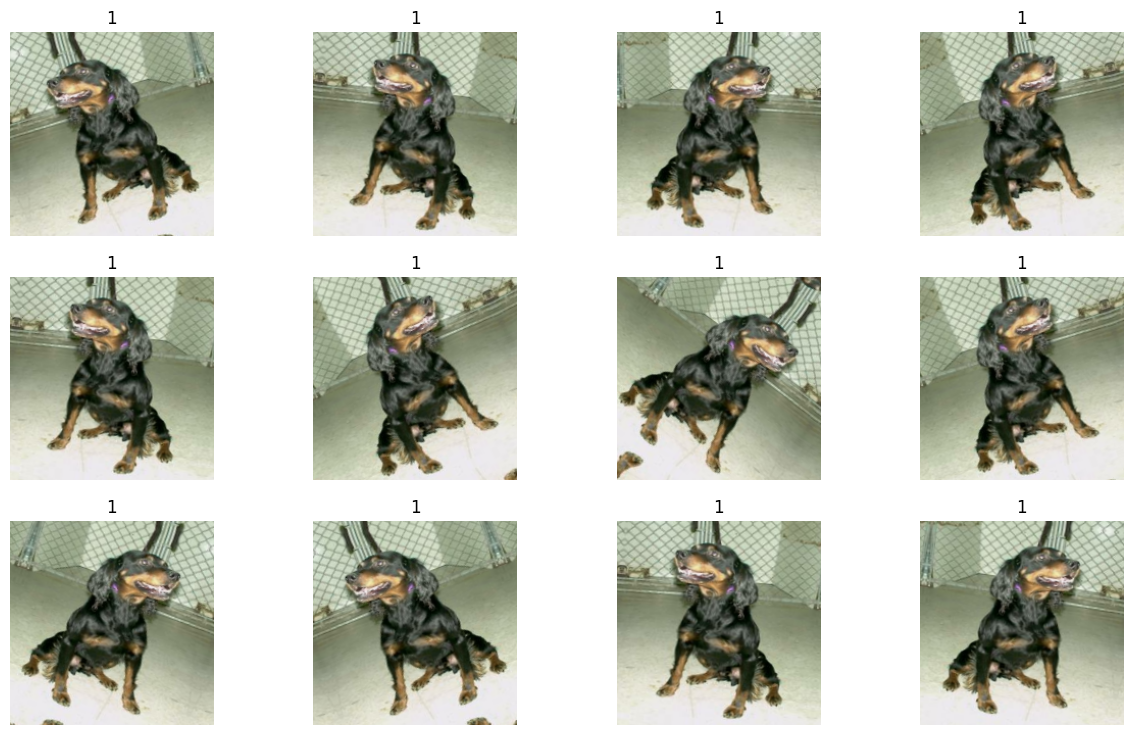

In [37]:
# visualize it
plt.figure(figsize=(15, 9))
    
for images, labels in test_set.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        augmented_image = augmented_data(images[0])
        plt.imshow(augmented_image.numpy().astype('uint8'))
        plt.title(int(labels[0]))
        plt.axis('off')

## 3. Build the CNN model


The first layer in the model is a 2-dimensional convolutional layer. This layer will have 128 output filters each with a kernel size of 3x3, and we’ll use the relu activation function.

Note that the choice for the number of output filters specified is arbitrary, and the chosen kernel size of 3x3 is generally a very common size to use. You can experiment by choosing different values for these parameters.

We enable zero-padding by specifying padding = 'same'.

Sigmoid is used for binary classification methods where we only have 2 classes, while SoftMax applies to multiclass problems. In fact, the SoftMax function is an extension of the Sigmoid function.

In [38]:
# build the model
model = Sequential([

	# 1. Step 1 - Convolution
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(200, 200, 3)),
    
    # preprocessing
    layers.CenterCrop(180, 180),
    layers.Rescaling(scale=1./255),
    
    
    # applying image data augmentation
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),

	# Step 2 - Pooling
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

	# Adding a more convolutional layer
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
	# Step 3 - Flattening
    layers.Flatten(),
    
    # Step 5 - Output Layer
    layers.Dense(1, activation='sigmoid')
])

Note that when we have only two classes, we could instead configure our output layer to have two output, rather than one, and use categorical_crossentropy as our loss, rather than binary_crossentropy. Both options work equally well and achieve the exact same result.

With categorical_crossentropy, however, the last layer would need to use softmax, rather than sigmoid, as its activation function.

In [39]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 128)     3584      
                                                                 
 center_crop (CenterCrop)    (None, 180, 180, 128)     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 128)     0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 180, 180, 128)     0         
                                                                 
 random_rotation_1 (RandomRo  (None, 180, 180, 128)    0         
 tation)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 128)      0         
 )                                                    

## 4. Train the model

In [41]:
epochs = 50

# compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fit the model
model.fit(training_set, validation_data=test_set, epochs=epochs, verbose=2)

Epoch 1/50
4/4 - 61s - loss: 0.7097 - accuracy: 0.4583 - val_loss: 0.6929 - val_accuracy: 0.5250 - 61s/epoch - 15s/step
Epoch 2/50
4/4 - 47s - loss: 0.6947 - accuracy: 0.4583 - val_loss: 0.6928 - val_accuracy: 0.5167 - 47s/epoch - 12s/step
Epoch 3/50
4/4 - 47s - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6918 - val_accuracy: 0.5333 - 47s/epoch - 12s/step
Epoch 4/50
4/4 - 47s - loss: 0.6929 - accuracy: 0.4917 - val_loss: 0.6903 - val_accuracy: 0.5083 - 47s/epoch - 12s/step
Epoch 5/50
4/4 - 48s - loss: 0.6938 - accuracy: 0.4917 - val_loss: 0.6908 - val_accuracy: 0.5000 - 48s/epoch - 12s/step
Epoch 6/50
4/4 - 47s - loss: 0.6924 - accuracy: 0.5417 - val_loss: 0.6902 - val_accuracy: 0.5417 - 47s/epoch - 12s/step
Epoch 7/50
4/4 - 46s - loss: 0.6902 - accuracy: 0.5667 - val_loss: 0.6894 - val_accuracy: 0.5833 - 46s/epoch - 11s/step
Epoch 8/50
4/4 - 46s - loss: 0.6865 - accuracy: 0.5667 - val_loss: 0.6870 - val_accuracy: 0.5333 - 46s/epoch - 12s/step
Epoch 9/50
4/4 - 48s - loss: 0.6826 - ac

## 5. Visualize the predicted images


1/1 [==============================] - 1s 1s/step


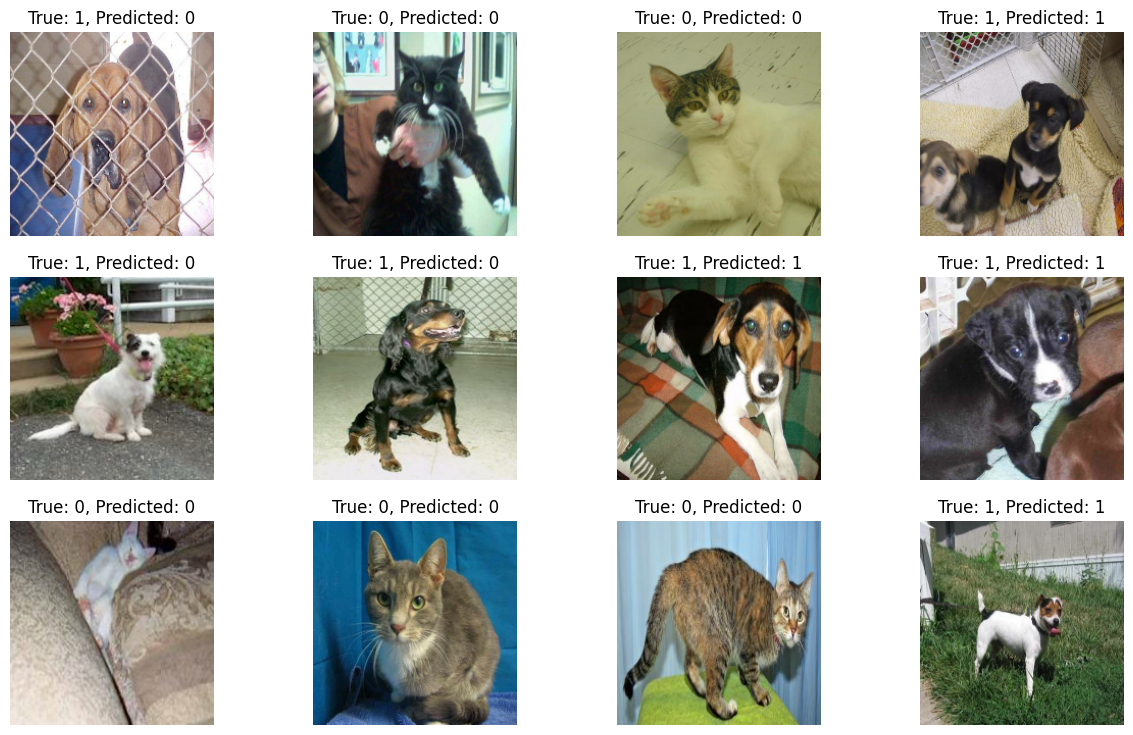

In [43]:
# visualize the predicted data
#loaded_model = keras.models.load_model('checkpoints/model_at_50.h5')

plt.figure(figsize=(15, 9))

def predict(imgs):
    pred = []
    for i in model.predict(images.numpy().astype('uint8')):
        if i[0] > .5:
            pred.append(1)
        else:
            pred.append(0)
    return pred
    
for images, labels in test_set.take(1):
    pred = predict(images)
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'True: {int(labels[i])}, Predicted: {pred[i]}')
        plt.axis('off')

### Making a single prediction

In [63]:
import numpy as np
from keras.utils import load_img
from keras.utils import img_to_array

# https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img

PATH_OF_IMAGE = './pusa.jpg'

test_image = load_img(PATH_OF_IMAGE, target_size = image_size)
test_image = img_to_array(test_image)
test_image = np.array([test_image])  # Convert single image to a batch.

result = model.predict(test_image)
if result[0][0] > .5:
  prediction = 'dog'
else:
  prediction = 'cat'

print(result)
print(prediction)

1/1 [==============================] - 0s 55ms/step
[[0.1373237]]
cat
